# Dimension Reduction(SpectralEmbedding、Isomap、LLE、t-SNE)

データの非線形次元圧縮(データがつながっている構造) →　SpectralEmbedding、Isomap  
これらがうまくいかない場合　→　LLE  

データの非線形次元圧縮(データが別れている構造) →　t-SNE  

参考 :  
Isomap : http://neuro-educator.com/ml24/  
SpectralEmbedding : http://neuro-educator.com/ml23/  
LLE　: http://neuro-educator.com/ml25/  

In [1]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cross_validation, preprocessing, decomposition, manifold #機械学習用のライブラリを利用
from sklearn import datasets #使用するデータ

/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 2：moon型のデータを読み込む--------------------------------
X,Y = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

# SpectralEmbedding

M個のデータをまずM×Mのグラフ行列(サンプルデータM個がそれぞれどのようにつながっているかを示す)へと変換した後に、PCA

In [3]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

In [9]:
# 4：カーネル主成分分析を実施-------------------------------
kpca = decomposition.KernelPCA(n_components=2,  kernel='rbf', gamma=20.0)
X_kpca = kpca.fit_transform(X)
 
# 5：Spectral Embeddingを実施-------------------------------
spca = manifold.SpectralEmbedding(n_components=2,  affinity='nearest_neighbors')
X_spca = spca.fit_transform(X)

詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html

<function matplotlib.pyplot.show>

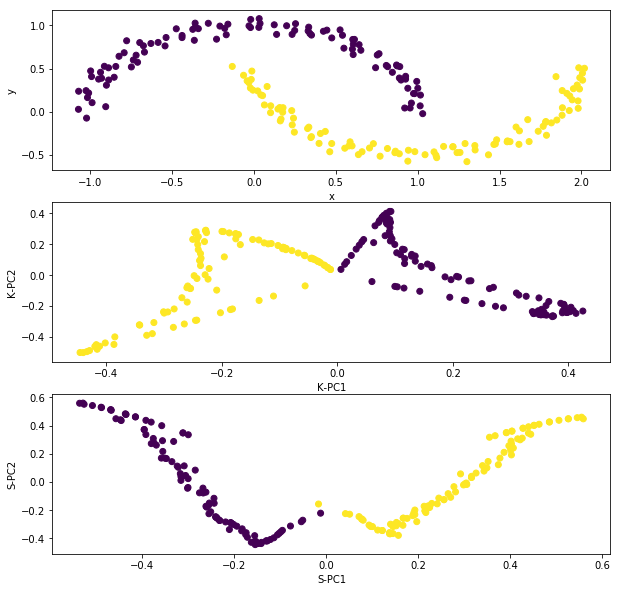

In [10]:
# 6: 結果をプロットする-----------------------------
%matplotlib inline
 
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('x')
plt.ylabel('y')
 
plt.subplot(3, 1, 2)
plt.scatter(X_kpca[:,0],X_kpca[:,1], c=Y)
plt.xlabel('K-PC1')
plt.ylabel('K-PC2')
 
plt.subplot(3, 1, 3)
plt.scatter(X_spca[:,0],X_spca[:,1], c=Y)
plt.xlabel('S-PC1')
plt.ylabel('S-PC2')
 
plt.show

---

# Isomap

多様体上の距離を測定し、多次元尺度構成法で表現した次元圧縮手法  
3次元空間にデータが分布していたとしても、実はとある平面上に分布していたとすると、データの次元は2次元で表すことができる  

各データの多様体上での距離を求めるのは、一見難しそうですが、単純に近いデータとのつながりを使用する。  
こうして各データがその他のデータとどうつながっているのかというグラフ行列に似た「測地線距離行列」が生成される   
あとは「多次元尺度構成法」で測地線距離行列を低次元で表す  
多次元尺度構成法は測地線距離行列が似ているものは近くに、似ていないものは遠くに配置する方法  

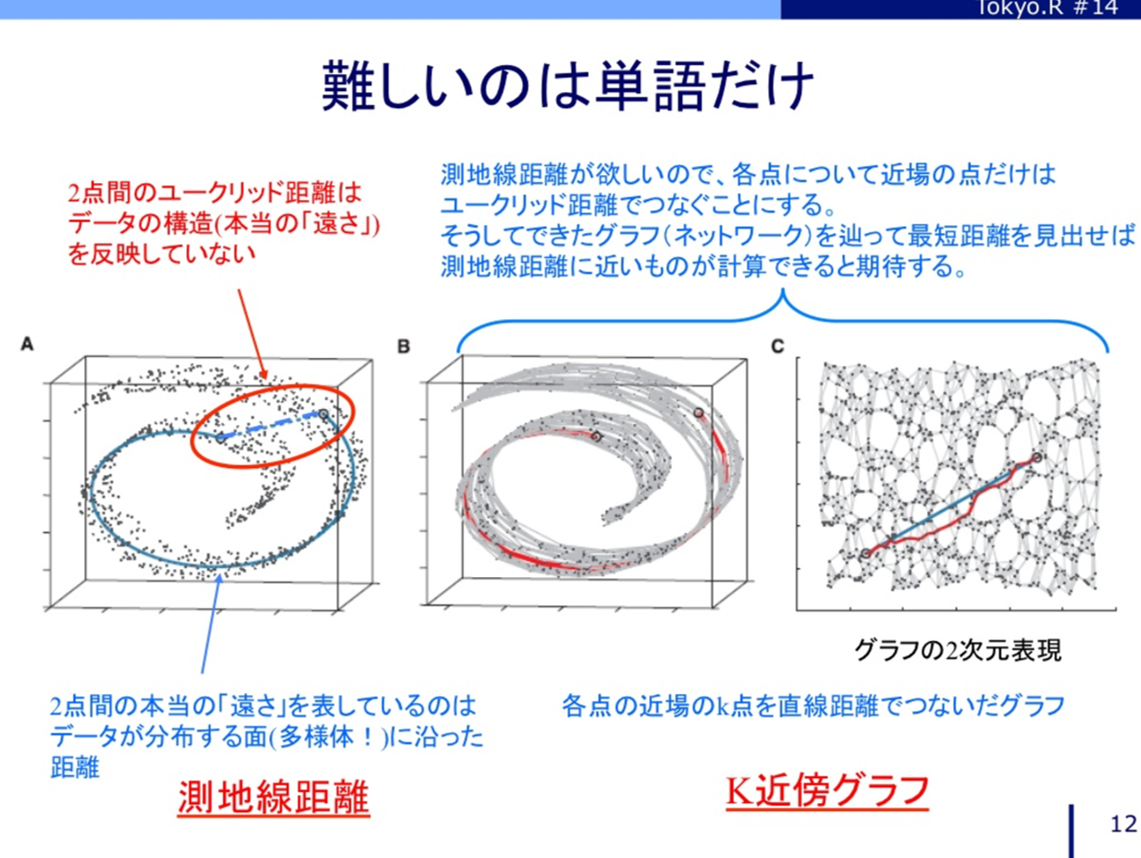

In [11]:
from IPython.display import Image, display_png
display_png(Image("./images/isomap.png"))

https://www.slideshare.net/kohta/risomap

In [12]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

In [13]:
# 4：Spectral Embeddingを実施-------------------------------
se = manifold.SpectralEmbedding(n_components=2,  affinity='nearest_neighbors')
X_se = se.fit_transform(X)

In [14]:
# 5：Isomapを実施-------------------------------
isomap = manifold.Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X)

詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/manifold.html#isomap

<function matplotlib.pyplot.show>

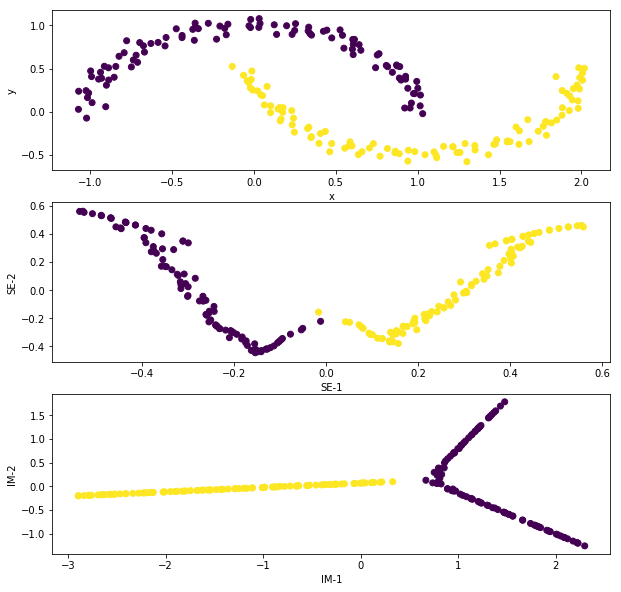

In [15]:
# 6: 結果をプロットする-----------------------------
%matplotlib inline
 
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('x')
plt.ylabel('y')
 
plt.subplot(3, 1, 2)
plt.scatter(X_se[:,0],X_se[:,1], c=Y)
plt.xlabel('SE-1')
plt.ylabel('SE-2')
 
plt.subplot(3, 1, 3)
plt.scatter(X_isomap[:,0],X_isomap[:,1], c=Y)
plt.xlabel('IM-1')
plt.ylabel('IM-2')
 
plt.show

---

# LLE (LocallyLinearEmbedding)

LLEは多様体上での距離を求める点はIsomapと同じ  
LLEはその後、多様体上で近くのデータ同士は線形な関係で表されるという拘束のもとで次元を圧縮する

In [16]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

In [17]:
# 4：Isomapを実施-------------------------------
isomap = manifold.Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X)

In [18]:
# 解説5：LLEを実施-------------------------------
lle = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X_lle = lle.fit_transform(X)

詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

<function matplotlib.pyplot.show>

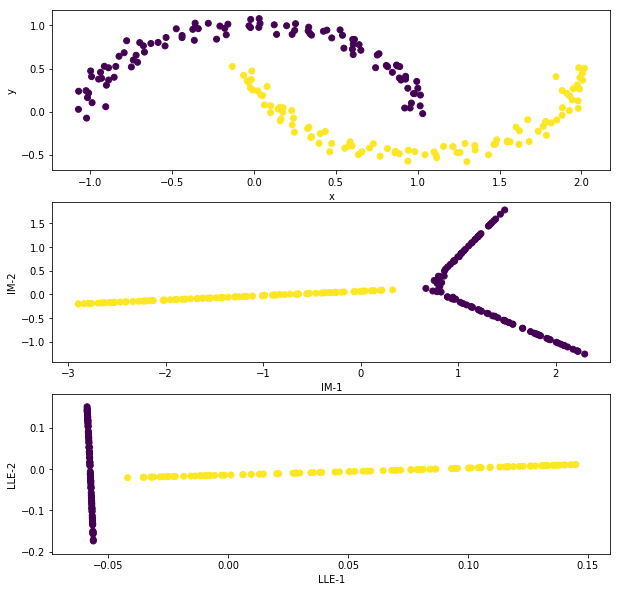

In [19]:
# 6: 結果をプロットする-----------------------------
%matplotlib inline
 
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('x')
plt.ylabel('y')
 
plt.subplot(3, 1, 2)
plt.scatter(X_isomap[:,0],X_isomap[:,1], c=Y)
plt.xlabel('IM-1')
plt.ylabel('IM-2')
 
plt.subplot(3, 1, 3)
plt.scatter(X_lle[:,0],X_lle[:,1], c=Y)
plt.xlabel('LLE-1')
plt.ylabel('LLE-2')
 
plt.show

---

# t-SNE

t-SNEについてはこちら  
https://qiita.com/stfate/items/8988d01aad9596f9d586  
https://blog.albert2005.co.jp/2015/12/02/tsne/
  
欠点は  
・ うまくいくことが保証されているのは2or3次元への圧縮のみ  
・　遅い  
・　最適化アルゴリズムの収束性が保証されていない  

scikit learn 実装は遅くはこっちの方が良いらしい...  
https://github.com/DmitryUlyanov/Multicore-TSNE

In [20]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

In [21]:
# 4：t-SNEを実施-------------------------------
sne = manifold.TSNE(n_components=2)
X_sne = sne.fit_transform(X)

詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE

<function matplotlib.pyplot.show>

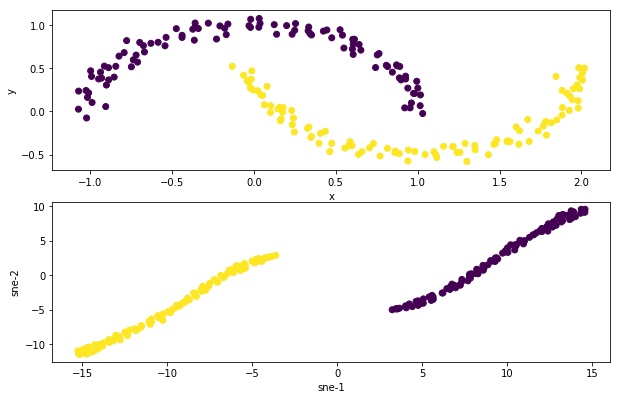

In [23]:
# 5: 結果をプロットする-----------------------------
%matplotlib inline
 
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('x')
plt.ylabel('y')
 
plt.subplot(3, 1, 2)
plt.scatter(X_sne[:,0],X_sne[:,1], c=Y)
plt.xlabel('sne-1')
plt.ylabel('sne-2')

plt.show